# Power transformation

In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

# with open-source packages
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import PowerTransformer

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# Plot histogram and Q-Q plots to explore the variable distribution


def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

In [7]:
plt.rcParams["figure.dpi"] = 450

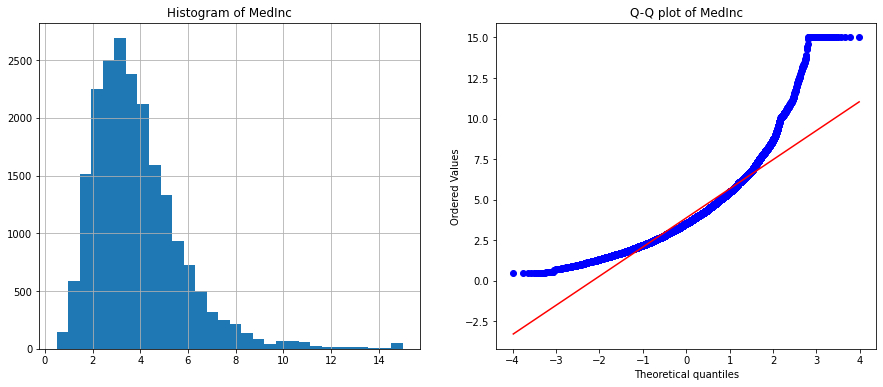

In [5]:
# check original distribution (not included in this recipe of book)

diagnostic_plots(X, "MedInc")

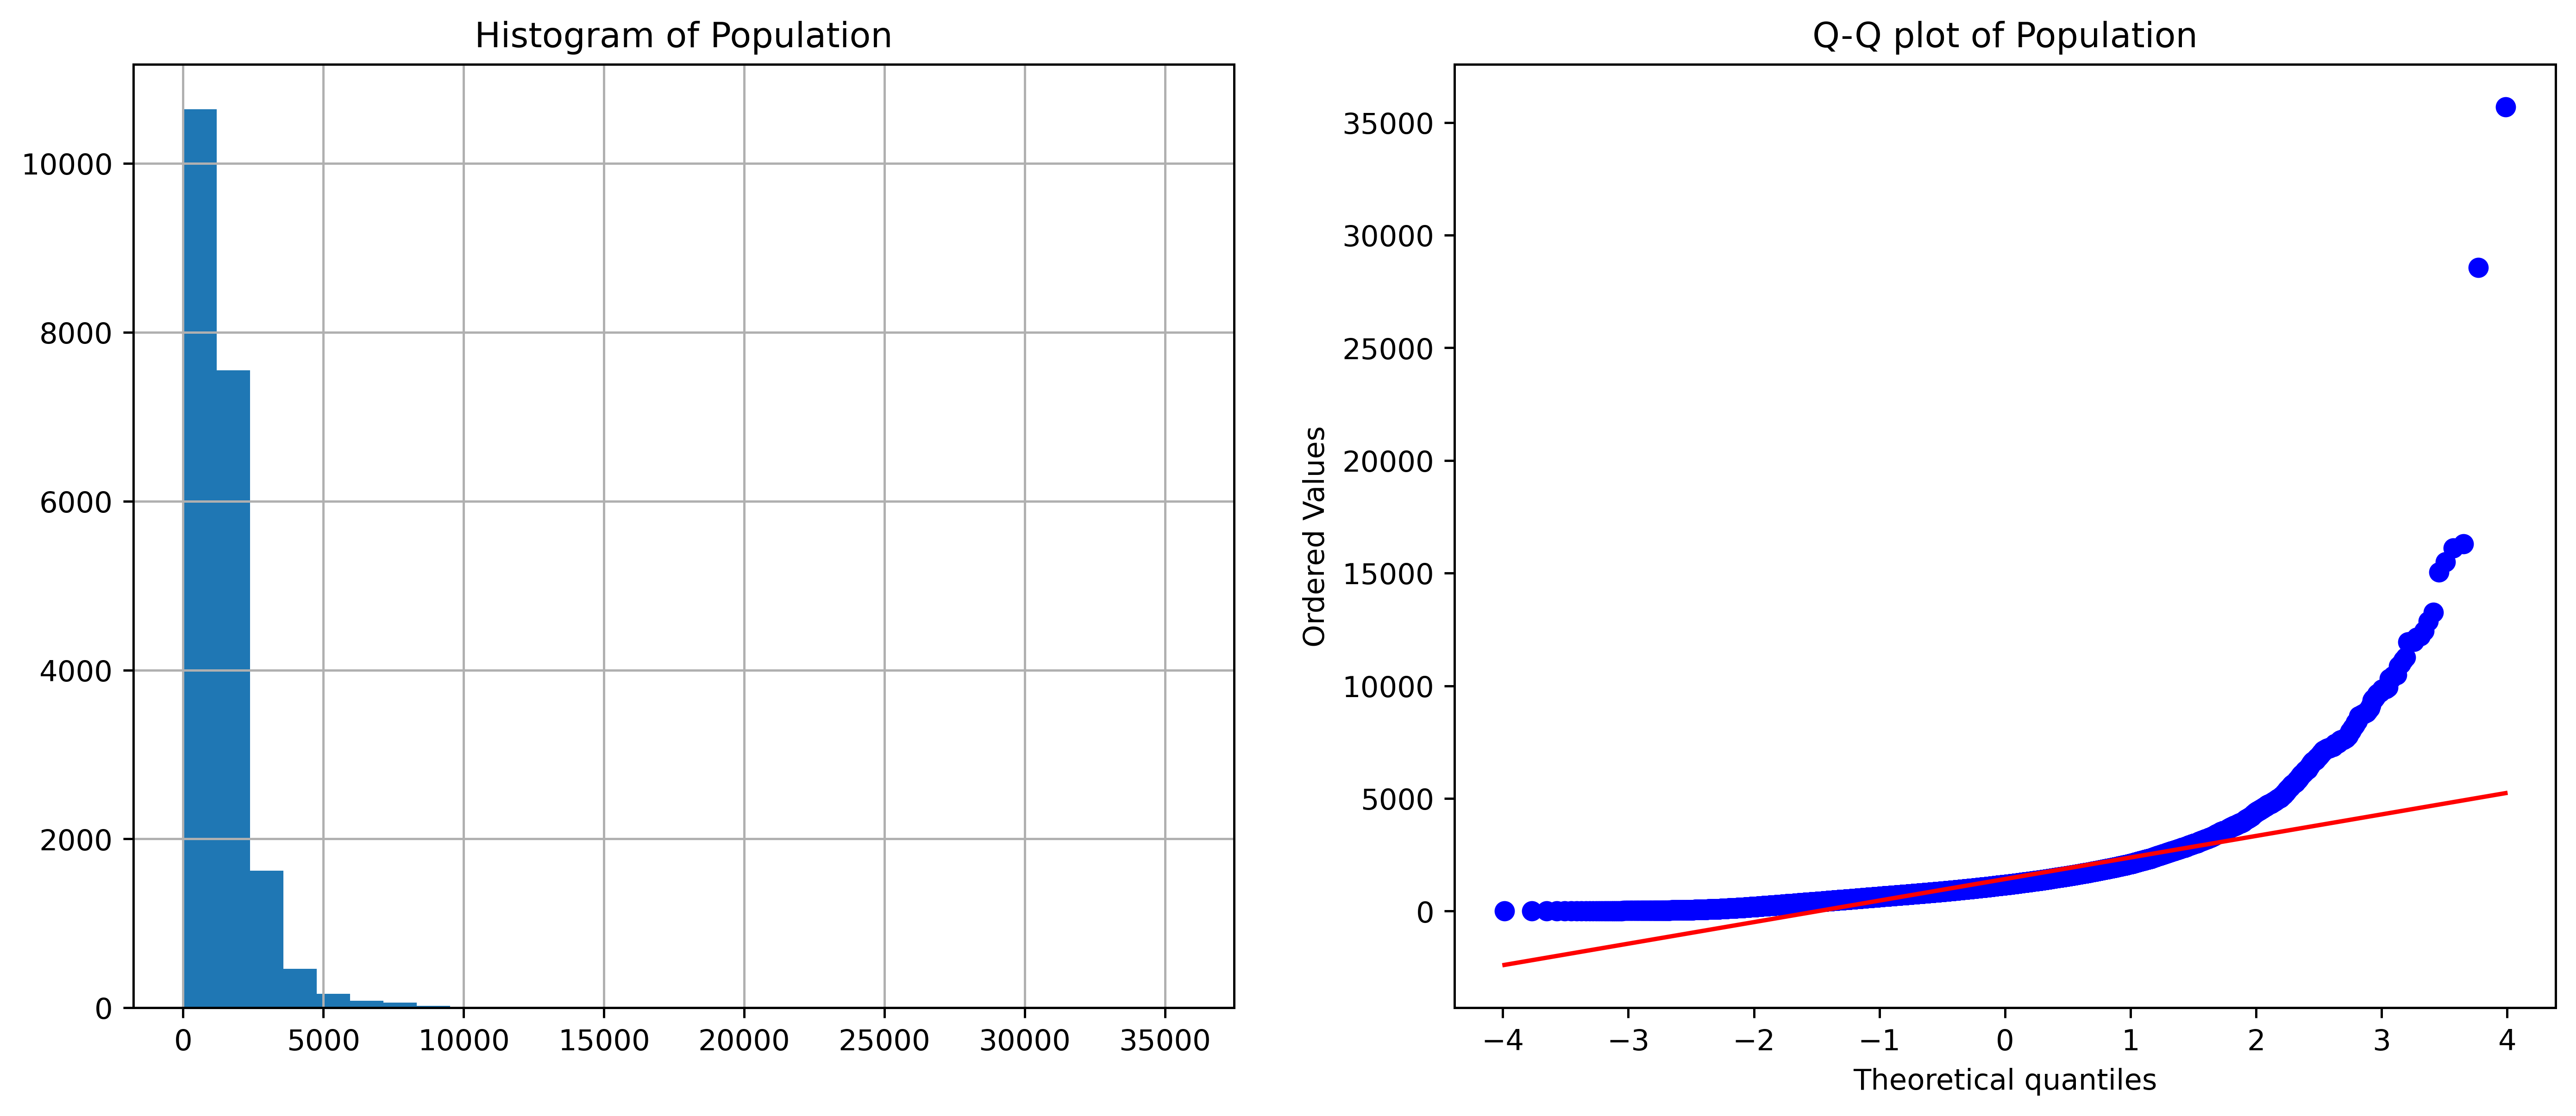

In [8]:
diagnostic_plots(X, "Population")

# Power transformation with NumPy

In [9]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

In [10]:
# make a list with the variables to transform

variables = ["MedInc", "Population"]

In [11]:
# apply a 0.3 exponent power transformation to a set of variables

X_tf[variables] = np.power(X[variables], 0.3)

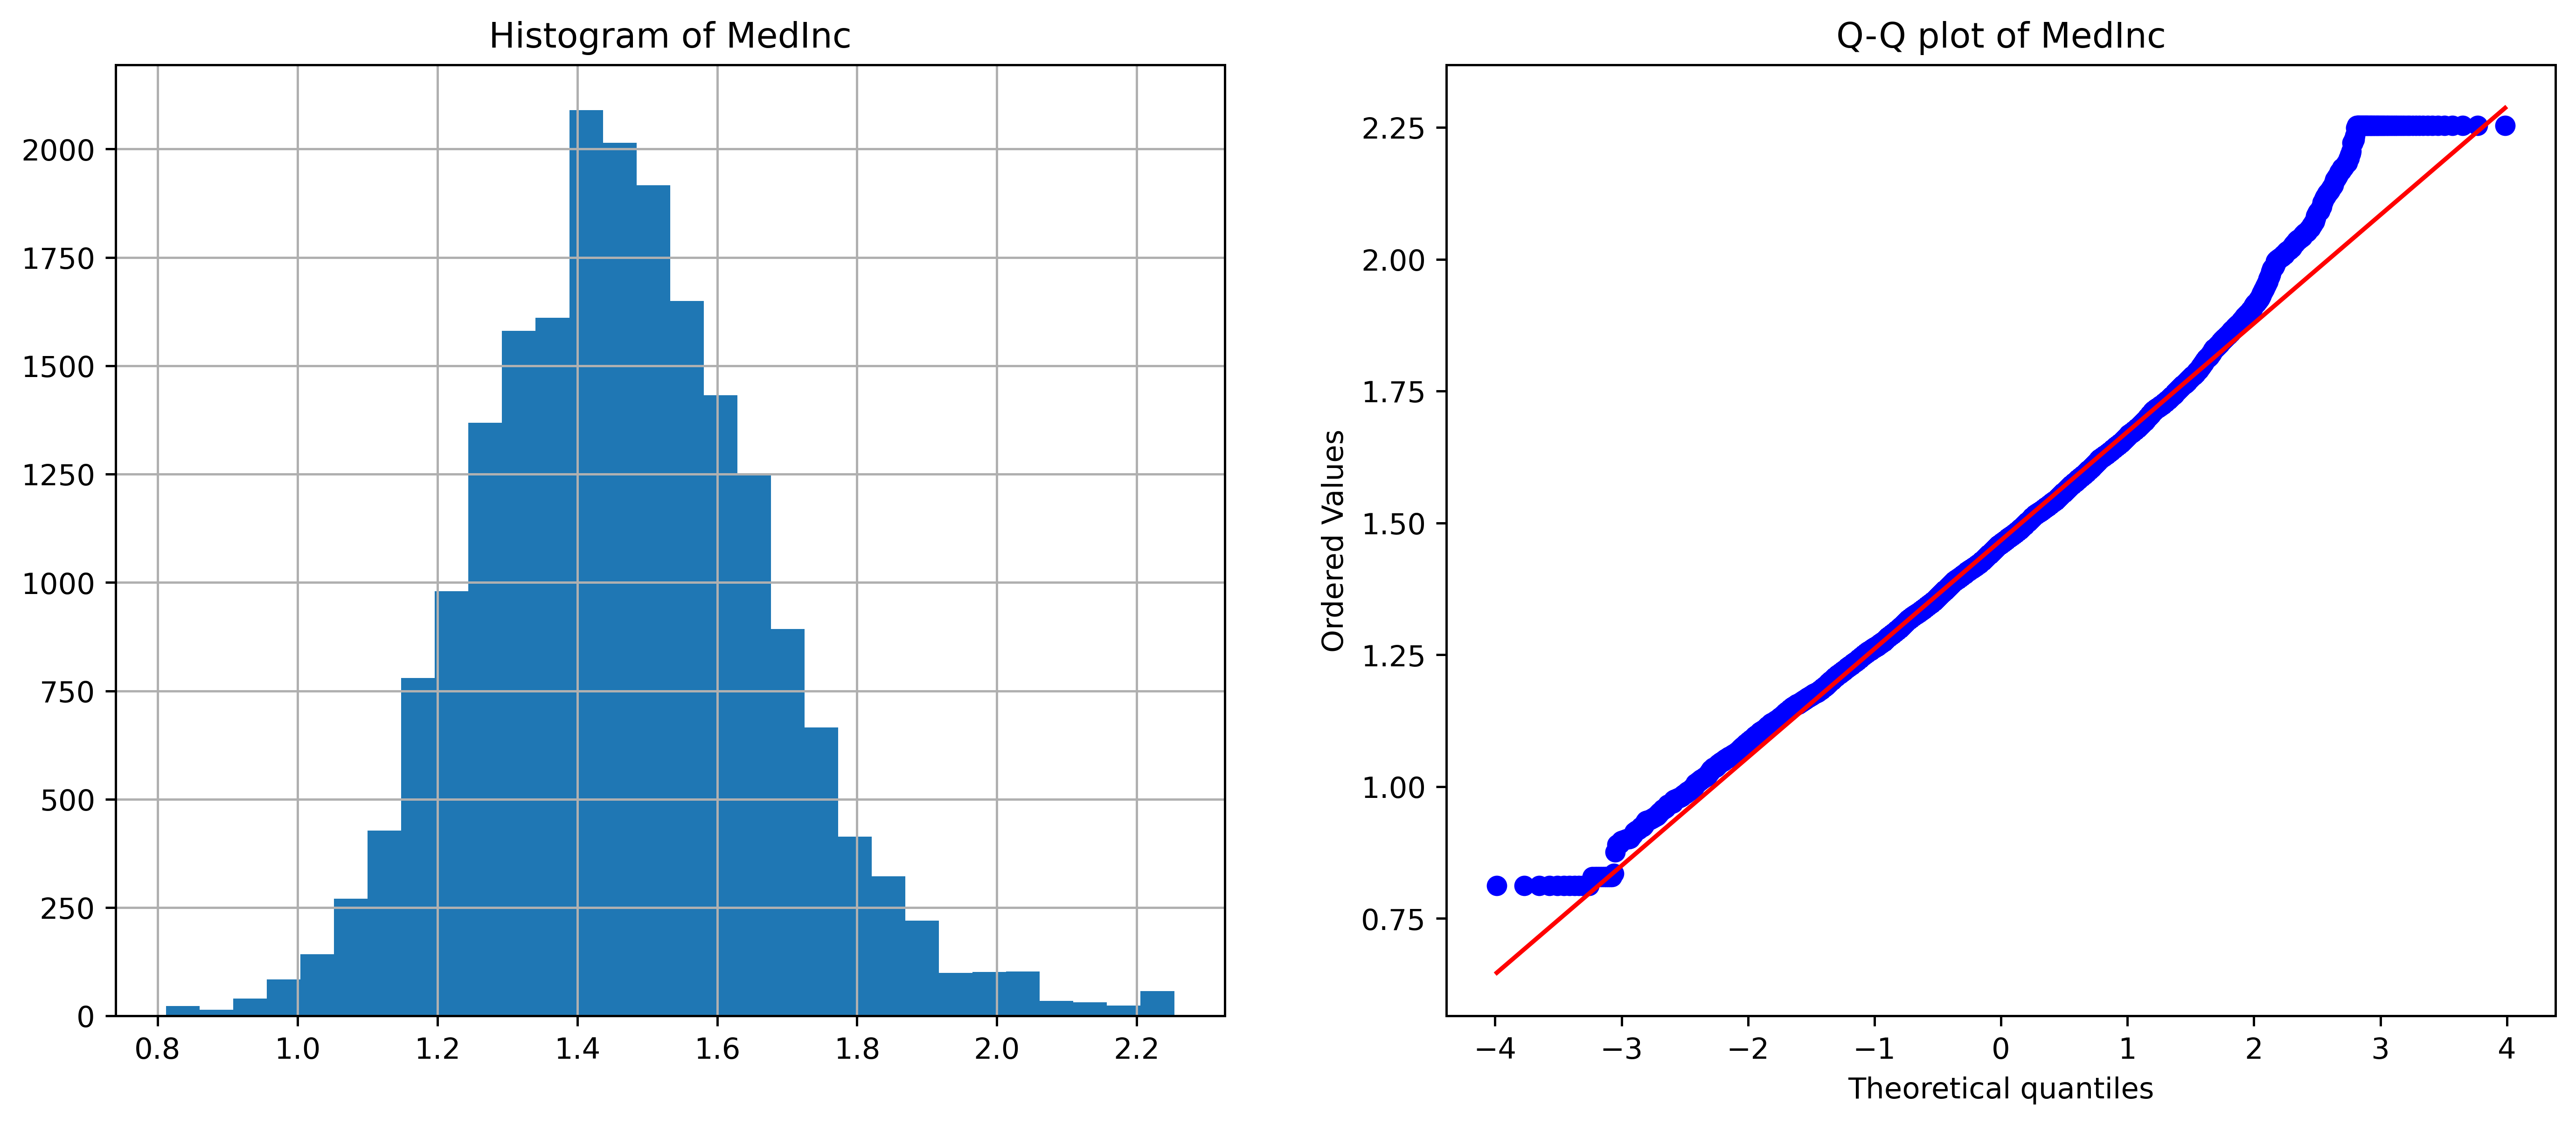

In [12]:
# check the distribution of the transformed variable

diagnostic_plots(X_tf, "MedInc")

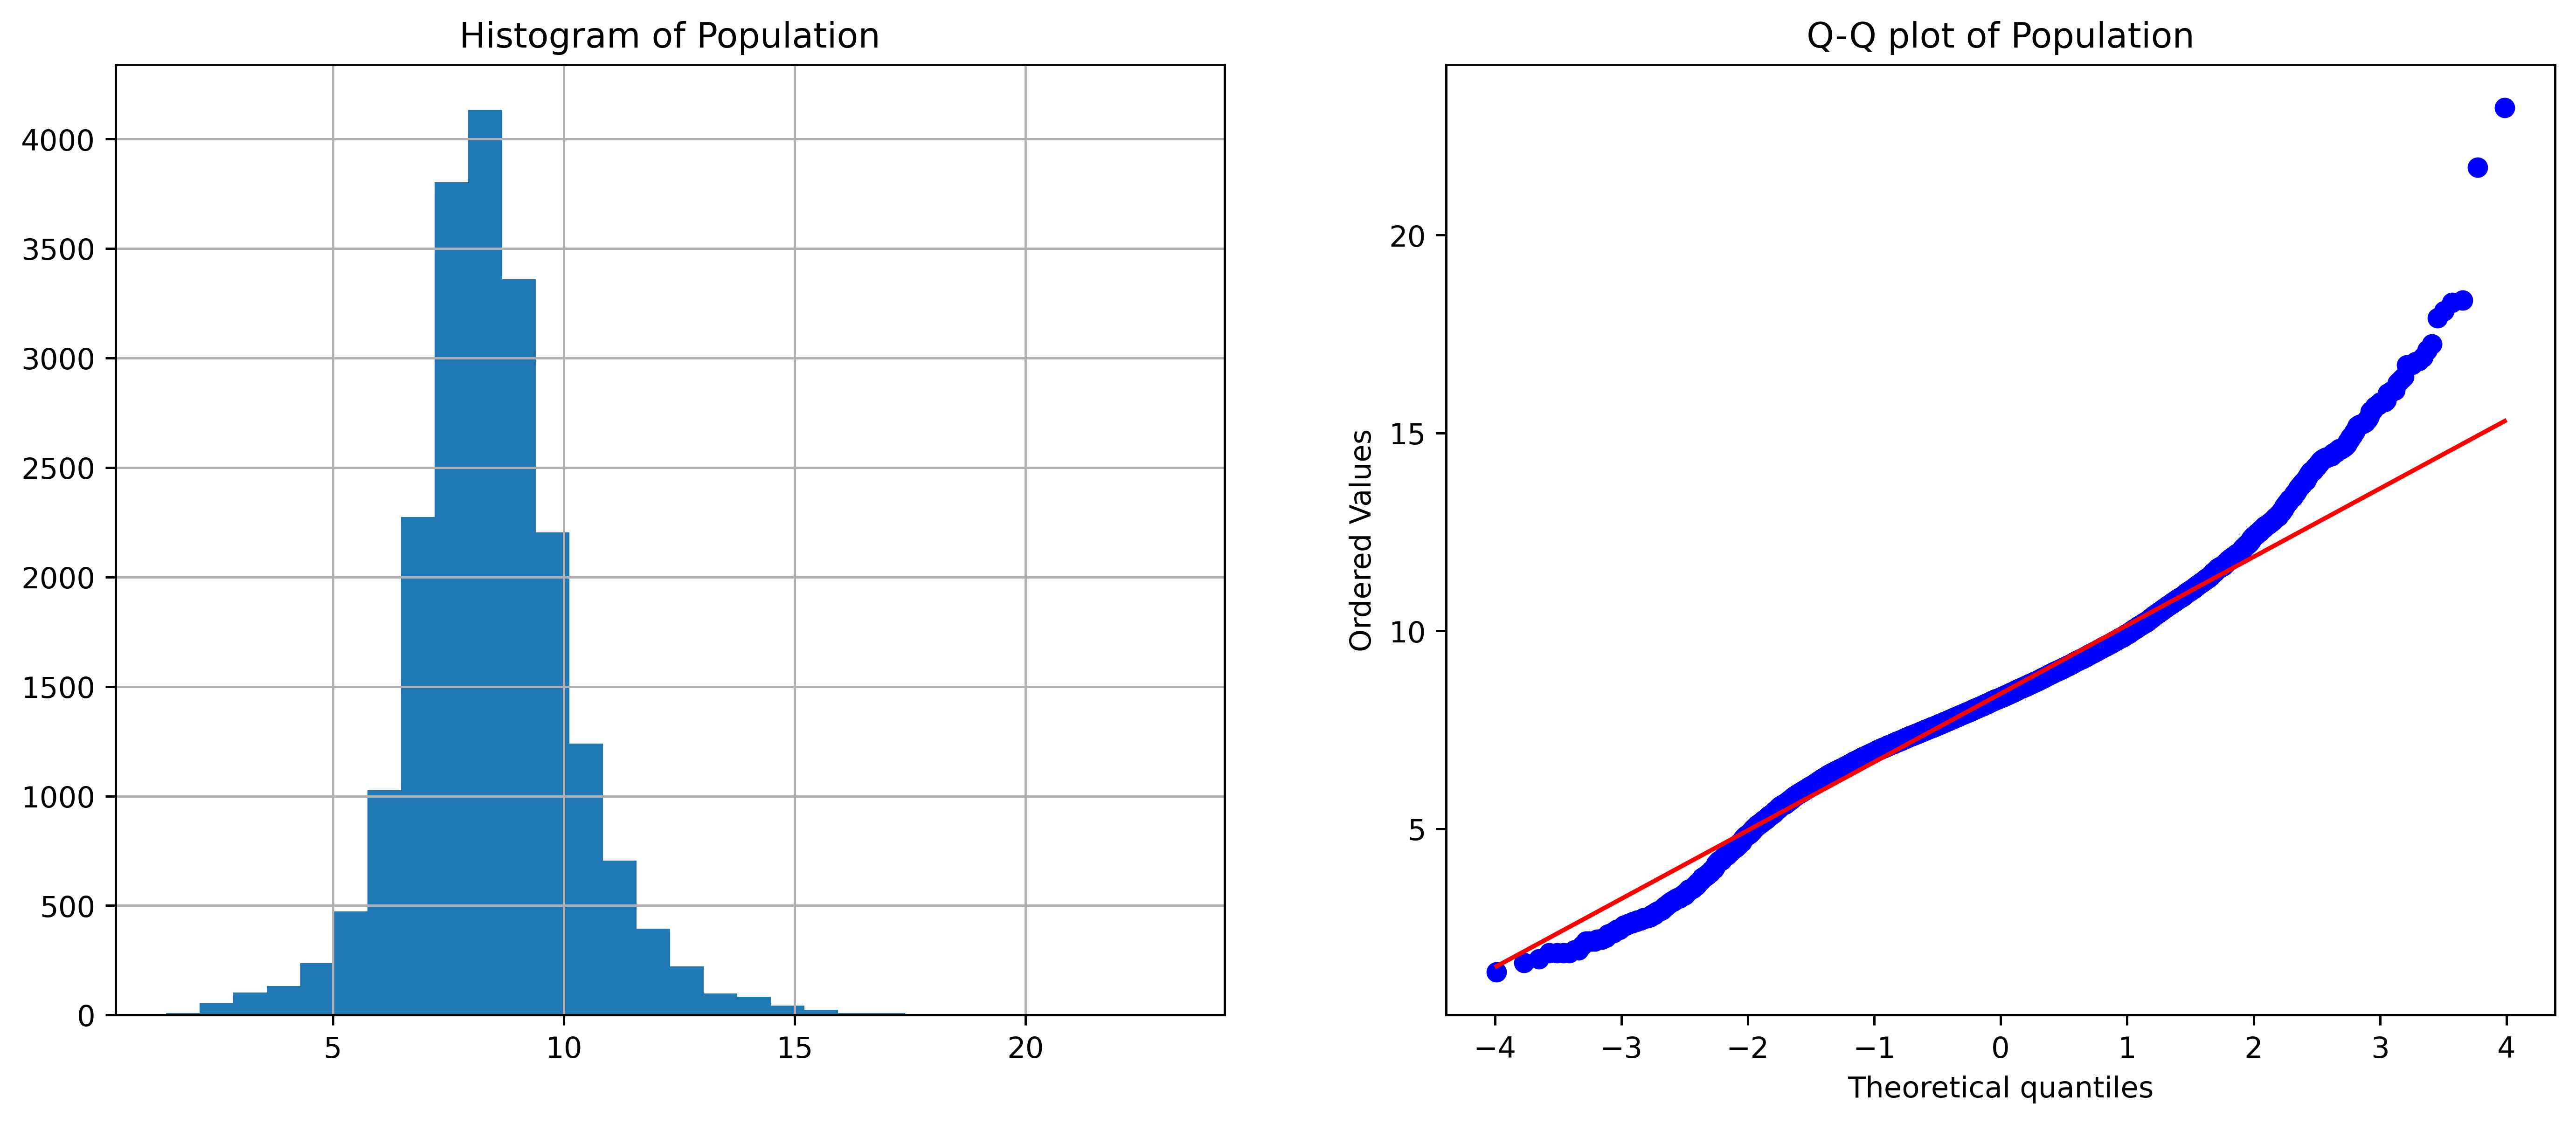

In [13]:
diagnostic_plots(X_tf, "Population")

## Power transformation with Scikit-learn

In [11]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

In [12]:
# set up the transformer with a user defined function, in this
# case the 0.3 power transformation

transformer = FunctionTransformer(lambda x: np.power(x, 0.3))

In [13]:
# transform slice of dataframe with indicated variables

X_tf[variables] = transformer.transform(X[variables])

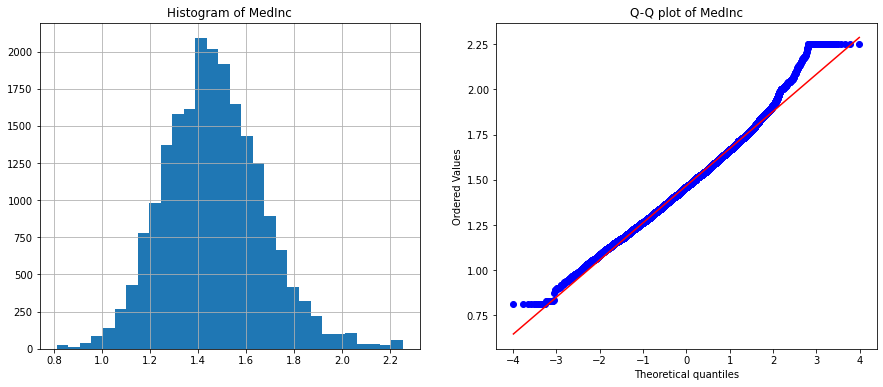

In [14]:
# visualize the transformation (not in book)

diagnostic_plots(X_tf, "MedInc")

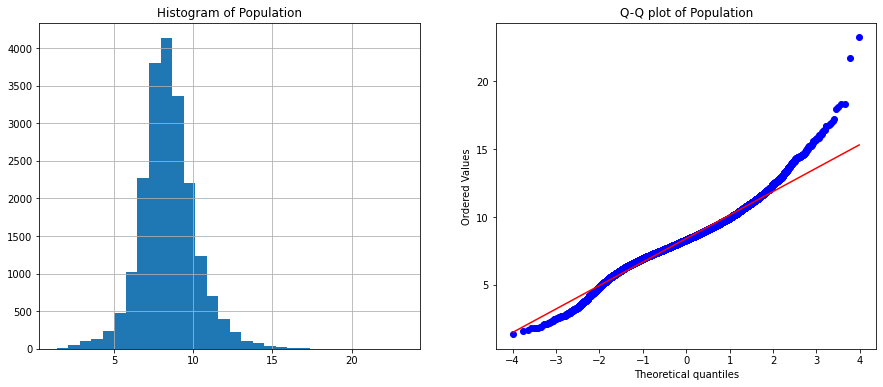

In [15]:
diagnostic_plots(X_tf, "Population")

# Power transformation with Feature-engine

In [16]:
# initialize the transformer with the variables to transform and
# the desired exponent

power_t = PowerTransformer(variables=variables, exp=0.3)

# fit transformer to data
power_t.fit(X)

PowerTransformer(exp=0.3, variables=['MedInc', 'Population'])

In [17]:
# transform selected variables

X_tf = power_t.transform(X)

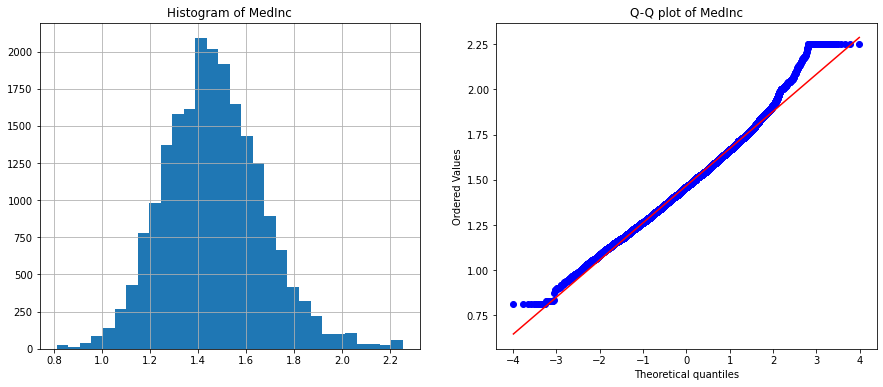

In [18]:
# check the distribution of the transformed variable

diagnostic_plots(X_tf, "MedInc")

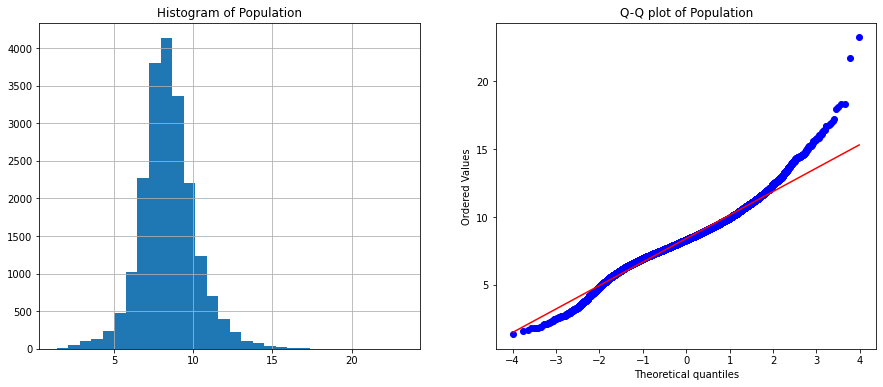

In [19]:
diagnostic_plots(X_tf, "Population")